For Text Mining assignment

1) Extract reviews of any product from ecommerce website like amazon 2) Perform emotion mining

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy
from matplotlib.pyplot import imread
from wordcloud import WordCloud,STOPWORDS
%matplotlib inline

In [1]:
!python -m spacy download en_core_web_sm

2023-08-21 06:08:13.710636: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-21 06:08:15.475854: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 26.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [17]:
stop=pd.read_csv('stop.txt',sep='|', encoding='latin-1')
stop

,a
0,a's
1,able
2,about
3,above
4,according
...,...
565,yours
566,yourself
567,yourselves
568,z


In [18]:
stop.columns

Index(['a'], dtype='object')

In [19]:
stop=[a.strip() for a in stop.a] # remove both the leading and the trailing characters
stop=[a for a in stop if a] # removes empty strings, because they are considered in Python as False
stop[0:10]

["a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards']

In [21]:
# Joining the list into one string/text
stop_text = ' '.join(stop)
stop_text

"a's able about above according accordingly across actually after afterwards again against ain't all allow allows almost alone along already also although always am among amongst an and another any anybody anyhow anyone anything anyway anyways anywhere apart appear appreciate appropriate are aren't around as aside ask asking associated at available away awfully b be became because become becomes becoming been before beforehand behind being believe below beside besides best better between beyond both brief but by c c'mon c's came can can't cannot cant cause causes certain certainly changes clearly co com come comes concerning consequently consider considering contain containing contains corresponding could couldn't course currently d definitely described despite did didn't different do does doesn't doing don't done down downwards during e each edu eg eight either else elsewhere enough entirely especially et etc even ever every everybody everyone everything everywhere ex exactly example 

In [22]:
#Punctuation
no_punc_text = stop_text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'as able about above according accordingly across actually after afterwards again against aint all allow allows almost alone along already also although always am among amongst an and another any anybody anyhow anyone anything anyway anyways anywhere apart appear appreciate appropriate are arent around as aside ask asking associated at available away awfully b be became because become becomes becoming been before beforehand behind being believe below beside besides best better between beyond both brief but by c cmon cs came can cant cannot cant cause causes certain certainly changes clearly co com come comes concerning consequently consider considering contain containing contains corresponding could couldnt course currently d definitely described despite did didnt different do does doesnt doing dont done down downwards during e each edu eg eight either else elsewhere enough entirely especially et etc even ever every everybody everyone everything everywhere ex exactly example except f f

In [23]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['as', 'able', 'about', 'above', 'according', 'accordingly', 'across', 'actually', 'after', 'afterwards', 'again', 'against', 'aint', 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'another', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'are', 'arent', 'around', 'as', 'aside', 'ask', 'asking', 'associated', 'at']


In [24]:
len(text_tokens)

571

In [25]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['able', 'according', 'accordingly', 'across', 'actually', 'afterwards', 'aint', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'among', 'amongst', 'another', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'arent', 'around', 'aside', 'ask', 'asking', 'associated', 'available', 'away', 'awfully', 'b']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['able', 'according', 'accordingly', 'across', 'actually', 'afterwards', 'aint', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'among', 'amongst', 'another', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways']


In [27]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['abl', 'accord', 'accordingli', 'across', 'actual', 'afterward', 'aint', 'allow', 'allow', 'almost', 'alon', 'along', 'alreadi', 'also', 'although', 'alway', 'among', 'amongst', 'anoth', 'anybodi', 'anyhow', 'anyon', 'anyth', 'anyway', 'anyway', 'anywher', 'apart', 'appear', 'appreci', 'appropri', 'arent', 'around', 'asid', 'ask', 'ask', 'associ', 'avail', 'away', 'aw', 'b']


In [28]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm')

In [30]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

able according accordingly across actually afterwards aint allow allows almost alone along already also although always among amongst another anybody anyhow anyone anything anyway anyways anywhere apart appear appreciate appropriate arent around aside ask asking associated available away


In [31]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['able', 'accord', 'accordingly', 'across', 'actually', 'afterwards', 'be', 'not', 'allow', 'allow', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'among', 'amongst', 'another', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway']


Feature Extraction

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [34]:
print(vectorizer.vocabulary_)

{'able': 0, 'accord': 1, 'accordingly': 2, 'across': 3, 'actually': 4, 'afterwards': 5, 'be': 35, 'not': 190, 'allow': 6, 'almost': 7, 'alone': 8, 'along': 9, 'already': 10, 'also': 11, 'although': 12, 'always': 13, 'among': 14, 'amongst': 15, 'another': 16, 'anybody': 17, 'anyhow': 18, 'anyone': 19, 'anything': 20, 'anyway': 21, 'anyways': 22, 'anywhere': 23, 'apart': 24, 'appear': 25, 'appreciate': 26, 'appropriate': 27, 'around': 28, 'aside': 29, 'ask': 30, 'associate': 31, 'available': 32, 'away': 33, 'awfully': 34, 'became': 36, 'become': 37, 'beforehand': 38, 'behind': 39, 'believe': 40, 'beside': 41, 'besides': 42, 'well': 315, 'beyond': 43, 'brief': 44, 'cmon': 51, 'cs': 62, 'come': 54, 'can': 45, 'cause': 46, 'certain': 47, 'certainly': 48, 'change': 49, 'clearly': 50, 'co': 52, 'com': 53, 'concern': 55, 'consequently': 56, 'consider': 57, 'contain': 58, 'correspond': 59, 'could': 60, 'course': 61, 'currently': 63, 'definitely': 64, 'describe': 65, 'despite': 66, 'do': 68, 'di

In [35]:
print(X.toarray().shape)

(476, 344)


In [36]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(stop)

Generate wordcloud

In [37]:

# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off");

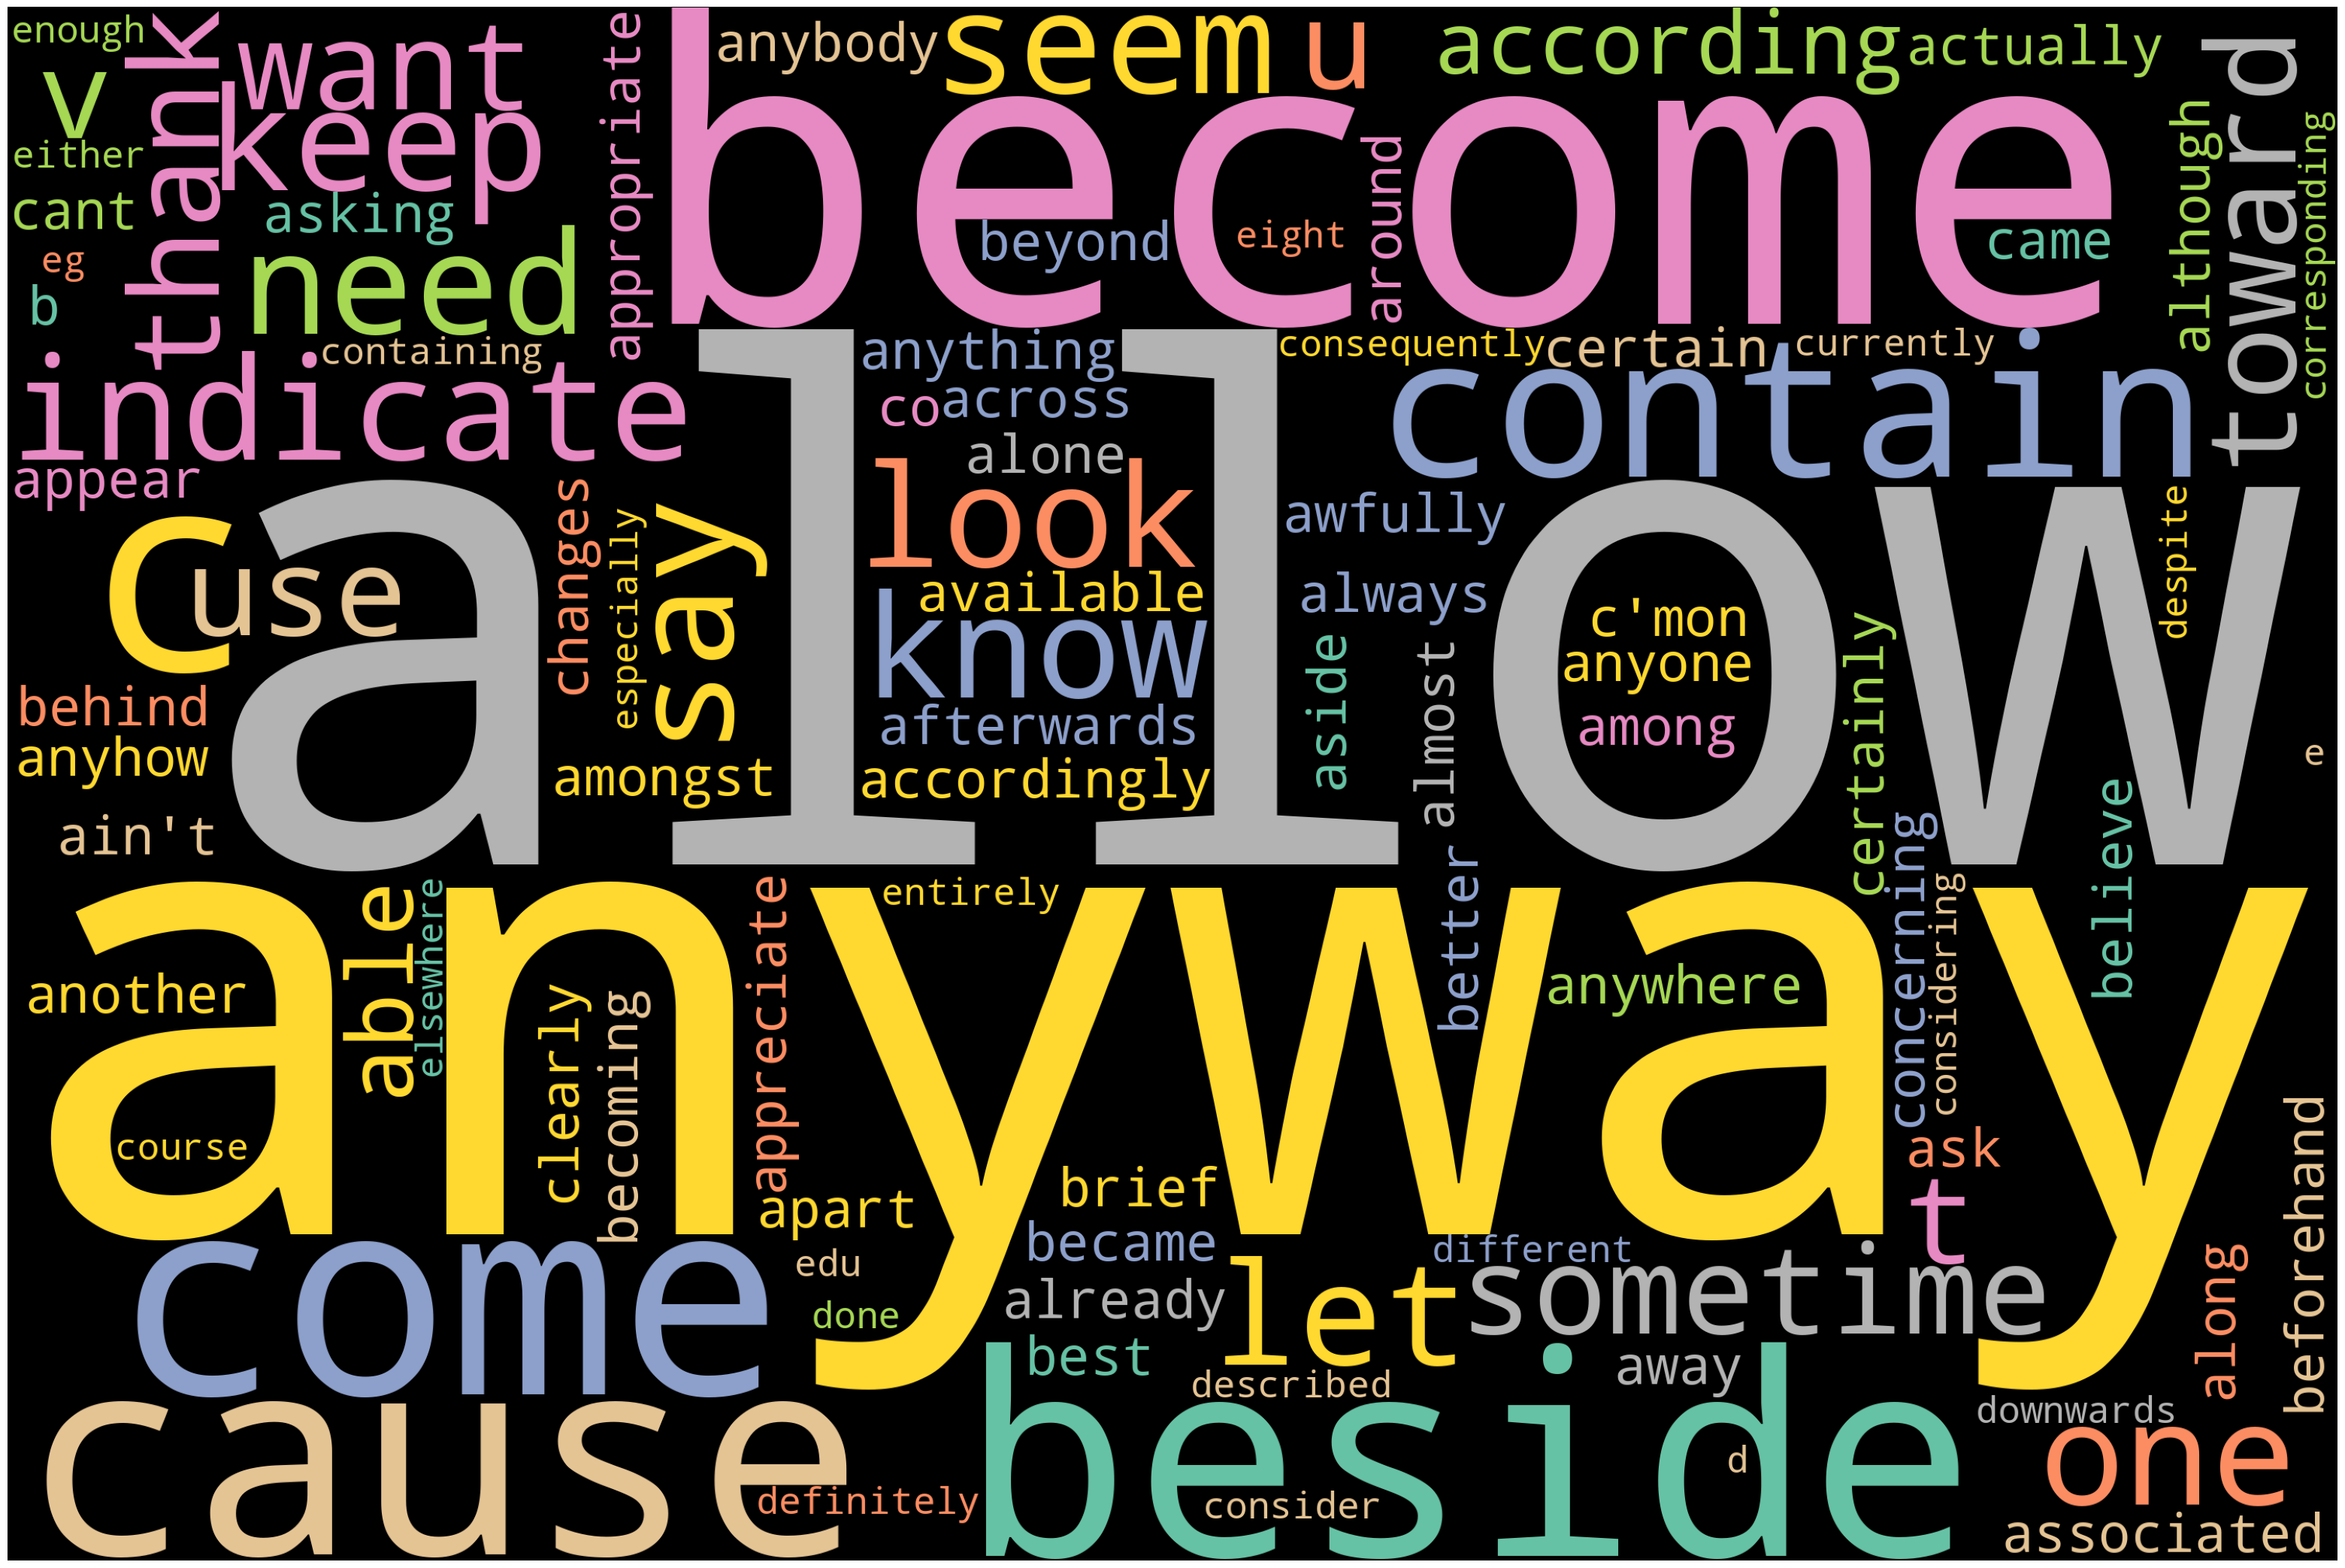

In [39]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(stop_text)
# Plot
plot_cloud(wordcloud)

Named_Entity_Recognition

In [40]:
clean_stop=' '.join(lemmas)
clean_stop

'able accord accordingly across actually afterwards be not allow allow almost alone along already also although always among amongst another anybody anyhow anyone anything anyway anyways anywhere apart appear appreciate appropriate be not around aside ask ask associate available away awfully b became become become become beforehand behind believe beside besides well well beyond brief c cmon cs come can not can not cause cause certain certainly change clearly co com come come concern consequently consider consider contain contain contain correspond could could not course currently definitely describe despite do not different do not do not do downward e edu eg eight either else elsewhere enough entirely especially et etc even ever every everybody everyone everything everywhere ex exactly example except f far fifth first five follow following follow former formerly forth four furthermore g get gets getting give gives go go going gone got get greeting h have not happen hardly have not have

In [42]:

##Part Of Speech Tagging
nlp = spacy.load('en_core_web_sm')
one_block = clean_stop
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)